# PageRank Dampening

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(13)

In this notebook we explore the effect of dampening in page rank. We start by creating a fake world, let's say with 10 webpages.

In [2]:
size = 10
pages = list(range(size))
links_from = {}
for i in range(size):
  j = np.random.randint(1,size)
  links_from[i] = np.random.choice(list(range(size)), j, replace=False)
links_from

{0: array([3, 5, 7]),
 1: array([4, 8, 0, 3, 1]),
 2: array([4]),
 3: array([1, 7, 8, 9, 0, 3, 5, 4, 2]),
 4: array([6, 0, 4, 3, 2, 5]),
 5: array([7, 1, 4, 5]),
 6: array([2, 6, 8, 9, 1, 7, 0]),
 7: array([5, 9, 7, 8]),
 8: array([0]),
 9: array([8, 7, 6, 5])}

So, we need to build the associated matrices and vectors

In [3]:
PR = 1/size * np.ones(size)
def create_transiction(links_from, d):
  M = np.zeros((size, size))
  for i in range(size):
    for j in links_from[i]:
      M[j, i] = 1/links_from[i].shape[0]
  E = 1/size * np.ones((size, size))
  transiction = (1-d) * E + d * M
  return transiction

transiction = create_transiction(links_from, d=0.8)

In [4]:
for i in range(2):
  PR = np.matmul(transiction , PR)
PR

array([0.1453081 , 0.07293561, 0.05604334, 0.10075965, 0.12955118,
       0.15178695, 0.06056115, 0.13809201, 0.08461815, 0.06034386])

In [5]:
rank = {i: [] for i in range(10)}

for d in np.linspace(0.01, 1, num=100):
  transiction = create_transiction(links_from, d=d)
  PR = 1/size * np.ones(size)
  for i in range(10):
    PR = np.matmul(transiction , PR)
  for i in range(10):
    args_sorted = np.argsort(-PR)
    rank[i].append(args_sorted[i])


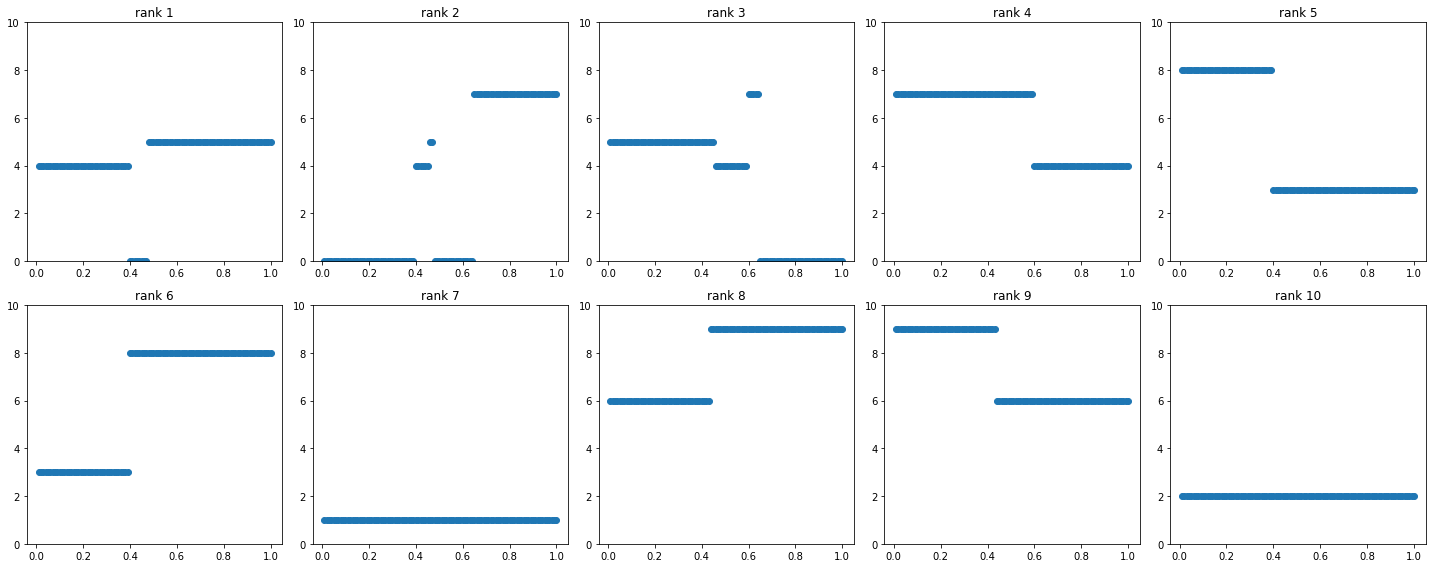

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
  for j in range(2):
    axs[j, i].scatter(np.linspace(0.01, 1, num=100), rank[j * 5 + i])
    axs[j, i].set_title('rank {}'.format(j * 5 + i + 1)) 
    axs[j, i].set_ylim(0,10)
plt.tight_layout()
plt.show()